In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats
import squarify

ModuleNotFoundError: No module named 'squarify'

In [9]:
data = pd.read_csv('Sample - Superstore.csv', encoding = 'windows-1252')
data.head().style.set_properties(**{"background-color": "#ff8282","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200}) 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0,219.582
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164


In [7]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null object
Ship Date        9994 non-null object
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 1.0+ MB


mengubah data object ke datetime

In [18]:
data['Order Date'] = pd.to_datetime(data['Order Date'].astype(str), errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'].astype(str), errors='coerce')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.1+ 

Rata-Rata Penjualan di masing-masing Wilayah

<BarContainer object of 4 artists>

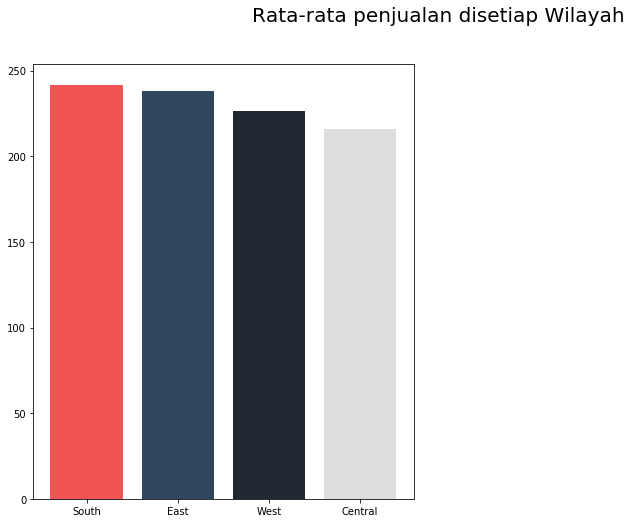

In [35]:
data_graf = data[['Region', 'Sales']]

data_graf = data_graf.groupby('Region').mean().sort_values(by ='Sales', ascending = False)
plt.figure(figsize=[15,8])

#visualisasi menggunakan barchart
plt.suptitle("Rata-rata penjualan disetiap Wilayah", size=20)

# Plotting the BarChart
plt.subplot(1,2,1)
plt.bar(x=data_graf.index, height='Sales', color=['#F05454','#30475E','#222831','#DDDDDD'], data=data_graf)

Rata-Rata Penjualan dan Profit selama periode waktu tertentu (Trend)

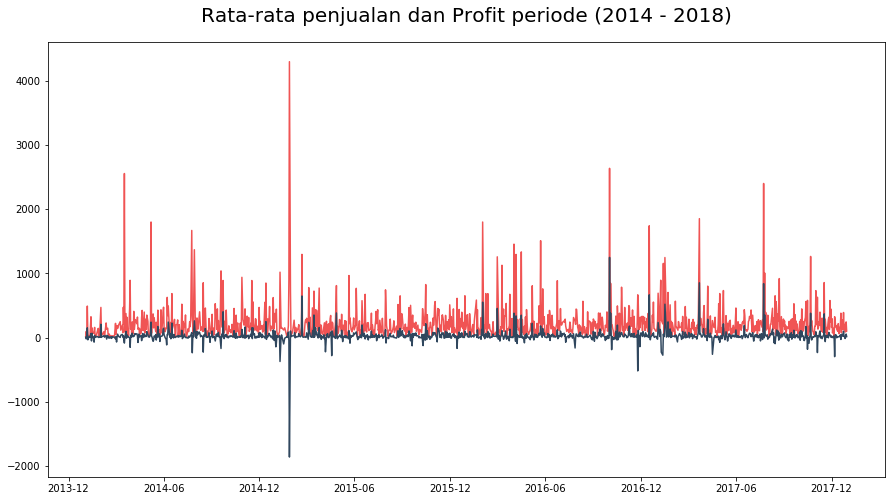

In [27]:
data_sales = data[['Order Date', 'Sales', 'Profit']].sort_values('Order Date')
data_sales['Order Date'] = pd.to_datetime(data_sales['Order Date']) #convert to datetime
data_sales = data_sales.groupby('Order Date').mean()
# Visualisasi
plt.figure(figsize=[15,8])
plt.plot(data_sales.index, 'Sales', data=data_sales, color='#F05454') # Avg Sales over Time
plt.plot(data_sales.index, 'Profit', data=data_sales, color='#30475E') # Avg Profit over Time
plt.title("Rata-rata penjualan dan Profit periode (2014 - 2018)", size=20, pad=20)

plt.show()

Relasi Antara Penjualan dan Laba

ValueError: `legend` must be 'brief', 'full', or False

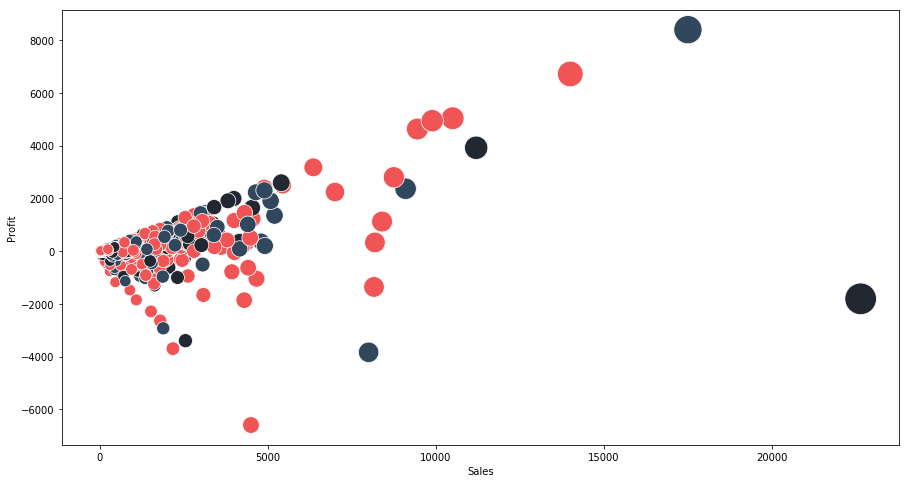

In [32]:
# Mengambil beberapa kolom
data_scatter = data[['Sales','Profit','Segment']]

# Visualisasi Scatterplot
plt.figure(figsize=[15,8])
# Profit pada sumbu Y, and Sales pada sumbu  X. Hue will classify the dots according to Segment.
# Ukuran titik-titik sesuai dengan volume "Penjualan".
sns.scatterplot(x=data_scatter['Sales'], y=data_scatter['Profit'], hue=data_scatter['Segment'], palette=['#F05454','#30475E','#222831'], size=data_scatter["Sales"], sizes=(100,1000), legend='auto') 
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

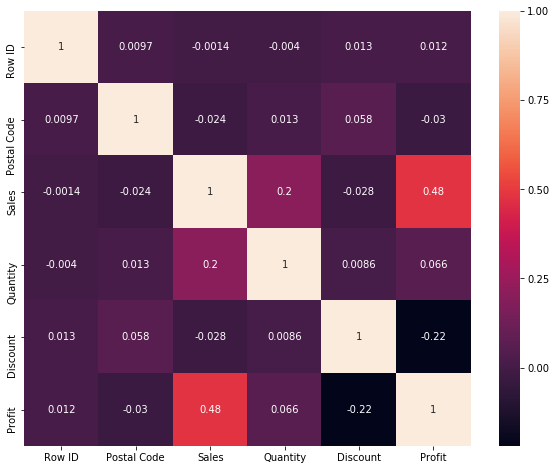

In [30]:
f, ax = plt.subplots(figsize=(10, 8))
RD = data.corr()
sns.heatmap(RD, ax=ax, annot=True)

Pengaruh Ship Mode terhadap Penjualan dan Profit

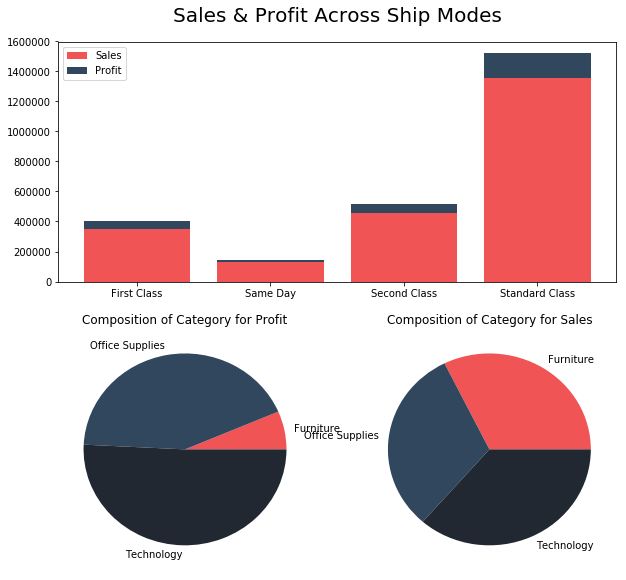

In [33]:
# Ambil beberapa kolom
data_stackb = data[['Ship Mode','Sales','Profit']]
# mengambil grup berdasarkan kategori dan Ship mode.
data_stackb = data_stackb.groupby(['Ship Mode']).sum().reset_index()

# Visualisasi Bar Chart
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=data_stackb['Ship Mode'], height=data_stackb['Sales'], color='#F05454')
plt.bar(x=data_stackb['Ship Mode'], height=data_stackb['Profit'], bottom=data_stackb['Sales'], color='#30475E')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['Sales','Profit'])

###################################################################
# Mengambil kolom
data_pie = data[['Category','Sales','Profit']]
# Mengroup kategori
data_pie = data_pie.groupby(['Category']).sum().reset_index()

# Visualisasi pie chart berdasarkan kategori (Profit)
plt.subplot(3,2,3)
plt.pie(data_pie['Profit'], labels=data_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Profit")

# Visualisasi pie chart berdasarkan kategori (Sales)
plt.subplot(3,2,4)
plt.pie(data_pie['Sales'], labels=data_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Sales")

plt.show()

<BarContainer object of 3 artists>

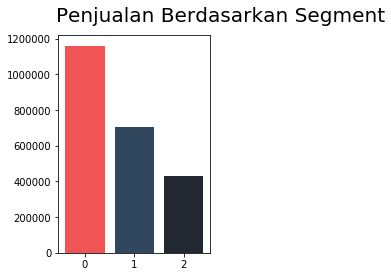

In [43]:
# Ambil kolom segment dan penjualan
data_tree = data[['Segment','Sales']]
# Mengkategorikan kolom segment
data_tree = data_tree.groupby(['Segment']).sum().reset_index()

#visualisasi menggunakan barchart
plt.suptitle("Penjualan Berdasarkan Segment", size=20)

# Plotting the BarChart
plt.subplot(1,2,1)
plt.bar(x=data_tree.index, height='Sales', color=['#F05454','#30475E','#222831'], data=data_tree)